In [1]:
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
p = open(r'G:\Jupyter\face_webcam_recog\train_imgs.pickle', 'rb')
# Load data from the pickle files
train_imgs = pickle.load(p)
p.close()
p1 = open(r'G:\Jupyter\face_webcam_recog\train_labels.pickle', 'rb')
train_labels = pickle.load(p1)
p1.close()

In [3]:
print(train_imgs.shape)

(7400, 256, 256, 3)


In [4]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256,256,3)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 256, kernel_size=(5,5), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 256, kernel_size=(5,5), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 512, kernel_size=(5,5), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 512, kernel_size=(5,5), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 256, activation='relu'),
    tf.keras.layers.Dense(units = 256, activation='relu'),
    tf.keras.layers.Dense(units = 64, activation='relu'),
    tf.keras.layers.Dropout(0.45),
    tf.keras.layers.Dense(units = 37, activation='softmax')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 256)      0

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [6]:
h = model.fit(
    x=train_imgs,
    y=train_labels,
    epochs=100,  # Adjust the number of epochs as needed
    validation_split=0.5,  # Set a suitable validation split
    batch_size=87,  # Adjust the batch size as needed
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],  # Early stopping to prevent overfitting
    verbose=1
)

Epoch 1/100
43/43 [==============================] - 38s 476ms/step - loss: 3.9429 - accuracy: 0.0281 - val_loss: 3.5956 - val_accuracy: 0.0381
Epoch 2/100
43/43 [==============================] - 13s 308ms/step - loss: 3.5630 - accuracy: 0.0457 - val_loss: 3.4969 - val_accuracy: 0.0786
Epoch 3/100
43/43 [==============================] - 13s 309ms/step - loss: 3.4499 - accuracy: 0.0846 - val_loss: 3.3144 - val_accuracy: 0.1114
Epoch 4/100
43/43 [==============================] - 13s 308ms/step - loss: 3.3285 - accuracy: 0.1076 - val_loss: 3.1528 - val_accuracy: 0.1692
Epoch 5/100
43/43 [==============================] - 13s 309ms/step - loss: 3.1160 - accuracy: 0.1632 - val_loss: 3.1239 - val_accuracy: 0.1797
Epoch 6/100
43/43 [==============================] - 13s 312ms/step - loss: 2.9726 - accuracy: 0.1919 - val_loss: 2.6105 - val_accuracy: 0.3176
Epoch 7/100
43/43 [==============================] - 13s 310ms/step - loss: 2.6793 - accuracy: 0.2622 - val_loss: 2.2943 - val_accuracy:

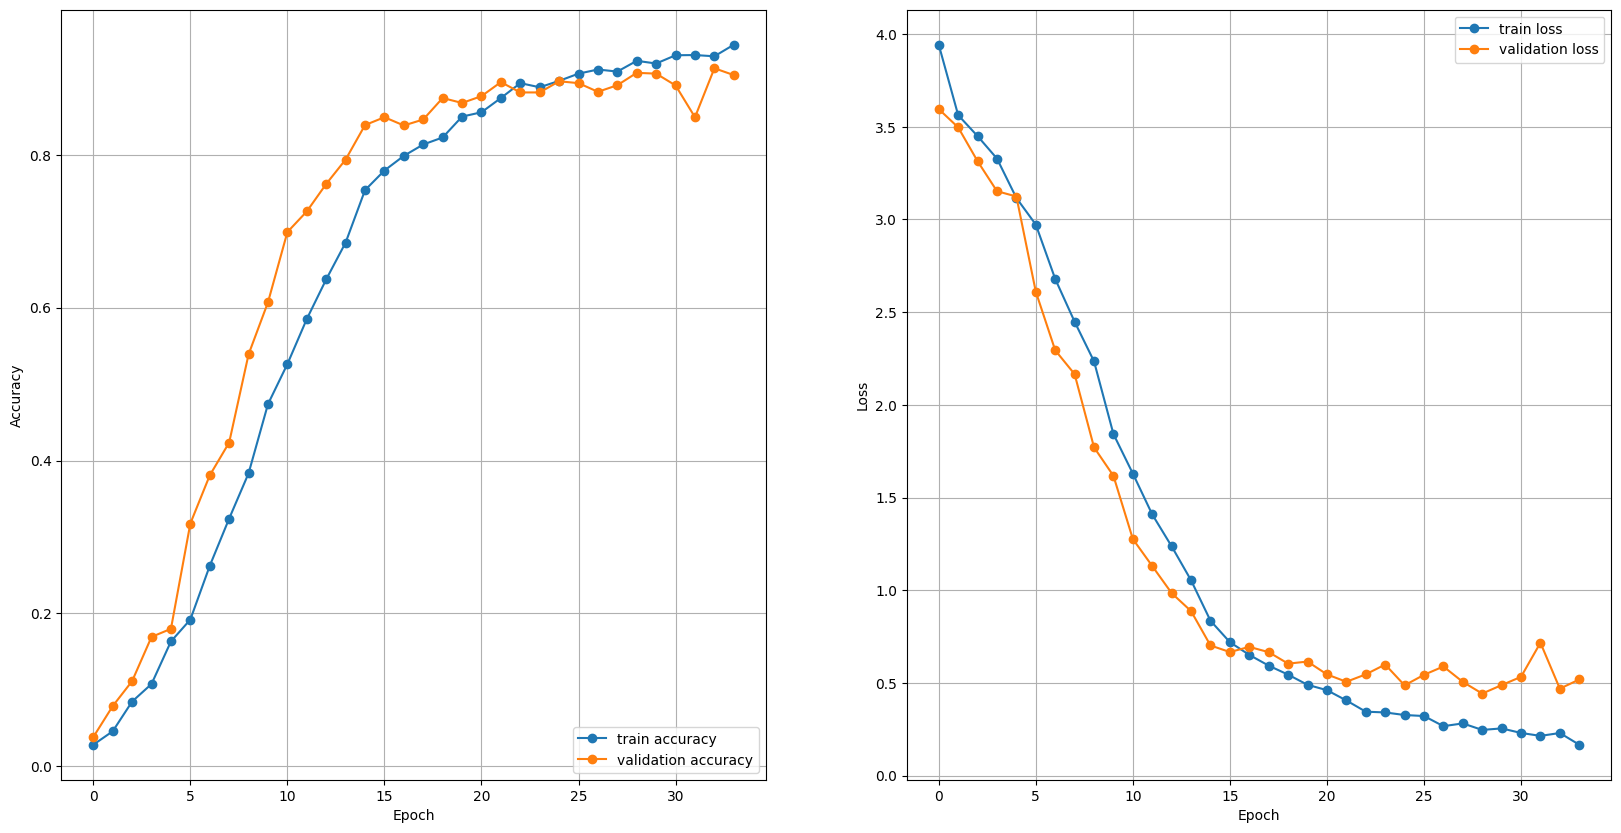

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [10]:
model.save("face_recog_200.h5")